# Homework #9

**See Canvas for the HW #9 assignment and due date. This assignment is optional**. Complete all of the following problems. Ideally, the theoretical problems should be answered in a Markdown cell directly underneath the question. If you don't know LaTex/Markdown, you may submit separate handwritten solutions to the theoretical problems, but please see the [class scanning policy](https://docs.google.com/document/d/17y5ksolrn2rEuXYBv_3HeZhkPbYwt48UojNT1OvcB_w/edit?usp=sharing). Please do not turn in messy work. Computational problems should be completed in this notebook (using the R kernel). Computational questions may require code, plots, analysis, interpretation, etc. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. 

## A. Theoretical Problems

## A.1 [8 points] Gamma/Exponential

**Let $X_1,...,X_n \overset{iid}{\sim} Exp(\lambda)$, and let the prior distribution on $\lambda$ be given by $\lambda \sim \Gamma(\alpha, \beta)$. Find the posterior distribution of $\lambda$ given the data.**

(HINT: You can just compute the numerator of Bayes' theorem, and notice that the form of the result, up to a constant (with respect to $\lambda$) takes a known pdf form.)

Note: 

The convention in this course will be to interpret $\Gamma(\alpha, \beta)$ as the "shape/rate" [parameterization](https://en.wikipedia.org/wiki/Gamma_distribution): If $Y \sim \Gamma(\alpha, \beta)$ then the pdf of $Y$ is given by 

\begin{align*}
f(y \, | \, \alpha, \beta) = \frac{\beta^\alpha}{\Gamma(\alpha)}y^{\alpha -1}e^{-\beta y}, \,\,\,\,\, y >0, \,\, \alpha > 0, \,\, \beta >0.
\end{align*}

Above, $\Gamma(\alpha)$ is the [Gamma function](https://en.wikipedia.org/wiki/Gamma_function) of $\alpha$. In the Gamma distribution, $\Gamma(\alpha)$ is just a normalizing constant, and so you do not need to compute it explicitly (just leave it as $\Gamma(\alpha)$).

Prior Distribution: $$\pi(\lambda|\alpha, \beta) = \frac{\beta^{\alpha}}{\Gamma(\alpha)}\lambda^{\alpha -1}e^{-\beta \lambda}$$ 

Likelihood: 
$$
    f(x_i|\lambda) = \prod^n_{i=1} \lambda e^{-\lambda x_i} = \lambda^n e^{\lambda \sum^n_{i=1}} = \lambda^n e^{\lambda n\bar{x}}
$$

Posterior: 
$$
    \pi(\lambda | y ) \propto f(x_i | \lambda) \pi(x|\alpha, \beta)
    = \lambda^n e^{\lambda n\bar{x}} \cdot \lambda^{\alpha -1}e^{-\beta \lambda} \\
    = \lambda^{n + \alpha -1} e^{-\lambda (n\bar{x} - \beta)} 
$$

## B. Computational Problems

## B.1 Poisson inference

Suppose that the number of species discovered each year is thought to be Poission distributed with rate parameter $\lambda$; that is, for year $t$, $X_t \, | \, \lambda \overset{iid}{\sim} Poisson(\lambda)$. We can use Bayesian inference with real data, $\mathbf{x}$, to estimate the true $\lambda$. Suppose that our prior distribution on $\lambda$ is uniform between $0$ and $100$; that is, $\lambda \sim U(0,100)$. Further, suppose that, from 2010 to 2015, the number of new species discovered per year (in ascending order) is recorded as $\mathbf{x} = (64,13,33,18,30,20)$. Our goal in this problem will be to plot the posterior distribution of $\lambda \, | \, \mathbf{x}$.

**B.1(a) [2 points] First, construct a grid of $m =500$ values for $\lambda$ between $0$ and $100$. Then, compute the prior density at each value of $\lambda$, (denoated $\pi(\lambda)$).**

In [49]:
library(ggplot2)
m = 500; 
lam = seq(0, 100, length = m); 
prior = dunif(lam, 0, 100)

**B.1(b) [5 points] Then, construct the likelihood function for `x = c(64,13,33,18,30,20)` (denoted $f(\mathbf{x} \, | \, \lambda)$ ). Remember, since our data are iid, the likelihood function is the product of the marginal pmfs, with the data fixed at $x$, and with $\lambda$ as a variable.**

HINT: You can start with `likelihood = 1`. Then write a loop over `t = 1:6`, where, on each iteration, you multiply `likelihood` by the pmf of the Poisson for the $t^{th}$ data point given $\lambda $ (for the `lambda` constructed in B.1(a)).

In [23]:
x = c(64, 13, 33, 18, 30, 20)

likeli <- function(lam){
    likehood = 1
    for (i in x){
        likehood = likehood * dpois(i, lam)
    }
    return (likehood)
}

[1] 1.898653e-48 9.004063e-39 7.123038e-19 1.208351e-26 2.004786e-18
[6] 1.036317e-23

**B.1(c) [6 points] Compute and plot the posterior distribution of $\lambda \, | \, \mathbf{x}$. Comment on the shape of the distribution.**

Here, the posterior distribution, denoted $\pi(\lambda \, | \, \mathbf{x} )$, is given by

\begin{align*}
\pi(\lambda \, | \, \mathbf{x} ) = \frac{f(\mathbf{x} \, | \, \lambda )\pi(\lambda) }{\sum^{500}_{i = 1}f(\mathbf{x} \, | \, \lambda_i )\pi(\lambda_i)},
\end{align*}

where $\displaystyle\sum^{500}_{i = 1}f(\mathbf{x} \, | \, \lambda_i )\pi(\lambda_i)$ is the sum of the likelihood times the prior over all values of $\lambda$ in `lambda` from part B.1(a).

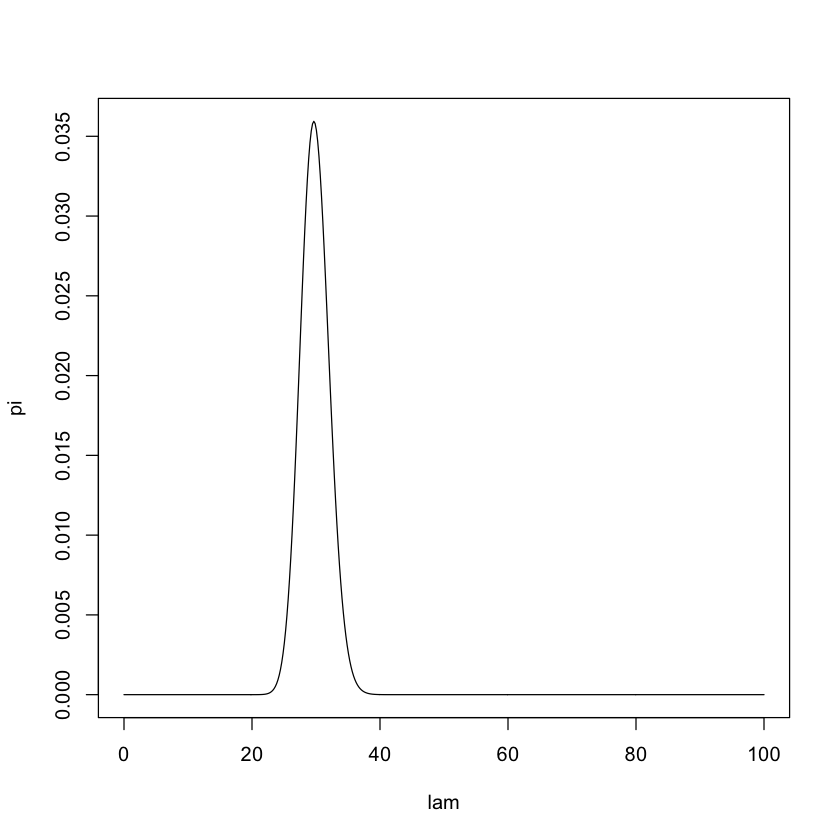

In [36]:
num = likeli(lam)* prior[1]
den = sum(likeli(lam) * prior) 
pi = num/den

plot(lam, pi, type ="l")

YOUR ANSWER HERE

# B.2 Maximum likelihood vs Bayesian inference

Imagine that, before class, I rolled a six-sided die and secretly recorded the outcome; this number is the target, $T$. Your goal in this problem is to guess $T$. 

There’s some evidence to take into account, however. Imagine that, after setting $T$, I roll the same six-sided die $10$ times. I don’t let you see how it lands, but each time I tell you (accurately) whether the number you just rolled was greater than, equal to, or less than $T$. After $10$ trials, you must guess what the target is. Here is the outcome of those $10$ trials:

$\mathbf{x} = (G, G, G, E, L, G, L, E, G, E)$

where 
- $G$ = the roll was greater than $T$
- $L$ = the roll was less than $T$, and 
- $E$ = the roll was equal to $T$.

Let's use Bayes' theorem to come up with a strategy for guessing $T$.

Bayes' theorem tells us that, for $t = 1,...,6$:

\begin{align*}
P(T = t \, | \, \mathbf{x}) = \frac{P(\mathbf{x} \, | \, T = t)P(T=t)}{P(\mathbf{x})}  = \frac{P(\mathbf{x} \, | \, T = t)P(T=t)}{\sum^6_{t=1} P(\mathbf{x} \, | \, T = t)P(T=t)},
\end{align*}

where 

- $P(\mathbf{x} \, | \, T = t)$ is the *likelihood function* of the data conditioned on $T = t$.

- $P(T=t)$ is the *prior distribution* on $T=t$. Because I rolled the die in my office, the probability that $T=t$ for $t = 1,...,6$ is $P(T=t) = 1/6$. 

- $P(\mathbf{x}) = \sum^6_{t=1} P(\mathbf{x} \, | \, T = t)P(T=t)$ is the probability of the *evidence*. The equality is given by the Law of Total Probability. 

- $P(T = t \, | \, \mathbf{x})$ is the *posterior probability* of $T = t$ given the observations $\mathbf{x}$.

In order to compute the likelihood function for a given $T=t$, we'll need to calculate the probabilities of being less than ($p_l$), equal to ($p_e$), or greater than ($p_g$), $T = t$. 

For example, if $T = 1$, then $p_l = 0$ because it is not possible to roll less than a $1$. $p_e = 1/6$, because that's the probability of rolling a $1$. And $p_g = 5*(1/6) = 5/6$, because rolling greater than $1$ means rolling a $2$ **or** a $3$ **or** ... a $6$. The word **or** suggests summing each of the probabilities, and since each face has probability $1/6$, we multiply by $5$.

**B.2(a) [6 points] Write down general formula for $P(l \, | \, T = t)$, $P(e \, | \, T = t)$, and $P(g \, | \, T = t)$. This question is asking for a mathematical expression, not R code.**

$$
\begin{gather*}
    P(l | T = t) = (t-1)\frac{1}{6} \\
    P(e | T=t) = \frac{1}{6} \\
    P(g | T = t) = (6 - t)\frac{1}{6} \\
\end{gather*}
$$

**B.2(b) [3 points] Now, write an R function, called `p`, that takes in a value of $T$ and returns $P(l \, | \, T = t)$, $P(e \, | \, T = t)$, and $P(g \, | \, T = t)$.**

In [40]:
p <- function(T){
    return(c((T-1)*1/6, 1/6, (6-T)*1/6))
}

Next, calculate the likelihood function for a given $T=t$ together (we don't quite know how to do this on our own...yet).

Note that all of our rolls are independent, so the likelihood function - which is a joint probability density function (pdf) of the data given $T = t$ - is the product of the marginal pdfs, interpreted as a function of $t$.

**B.2(c) [4 points] Write down the likelihood function for our data, $\mathbf{x}$, given above in the problem description.**

$$
P(\mathbf{x}|T=t) = P(g|T)^5 \cdot P(e|T)^3 \cdot P(l|T)^2
$$

**B.2(d) [4 points] Now, write an R function, called `likelihood`, that takes in a value of $T$ and returns the likelihood function.**

In [75]:
likelihood <- function(T){
    probity = p(T)
    return(probity[1]^2 * probity[2]^3 * probity[3]^5)
}

**B.2(e) [4 points] Now, compute the probability of the data/evidence, $P(\mathbf{x}) = \sum^6_{t=1} P(\mathbf{x} \, | \, T = t)P(T=t)$. (Note that this is tricky in general, since it requires that we change $T$, and thus change $p_l$, $p_e$, and $p_g$. Luckily, we wrote a function to do that above and took it into account in our likelihood function!)**

In [68]:
sum_px = 0; 
for (x in 1:6){ 
    sum_px = sum_px + likelihood(x) * 1/6
}

**B.2(f) [7 points] Now we have all of the components for computing the posterior. So, compute the posterior for each $T=t$ and plot it using a bar chart.**

[1] 0.000000000 0.445217391 0.422608696 0.125217391 0.006956522 0.000000000

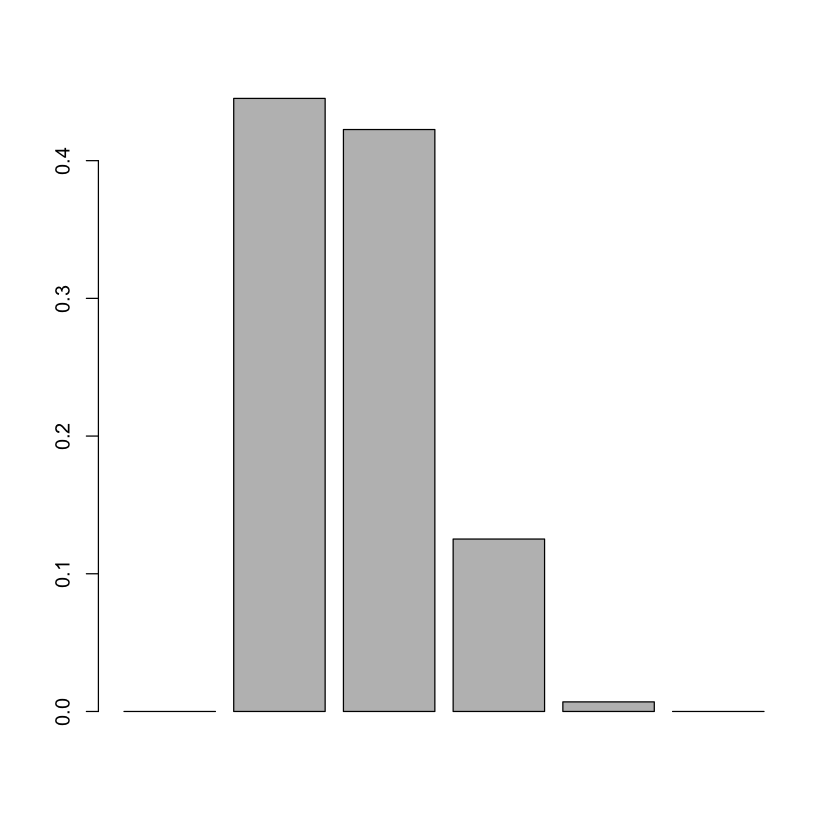

In [64]:
posterior = c(likelihood(1)*1/6/sum_px, likelihood(2)*1/6/sum_px,likelihood(3)*1/6/sum_px,
             likelihood(4)*1/6/sum_px,likelihood(5)*1/6/sum_px, likelihood(6)*1/6/sum_px)
posterior
barplot(posterior)

**B.2(g) [4 points] Interpret the posterior distribution from the previous part. What value of $T$ would you guess and why? How does did your belief update from your prior?**

The above graph shows that the rolls $2$ and $3$ will most likely be our posterior roll. I initially thought $5$ because $5$ has the most probabilistic roll from all number. My belief updated from my prior by looking at the chances the rolls will happen. 

**B.2(h) [6 points] Another strategy, as you know, is maximum likelihood estimation (MLE). MLE says that our best guess about $T$ should be the value of $T$ that maximizes the likelihood function over all values of $T$ ($1,...,6$). Calculate the MLE for the data $\mathbf{x}$. In the first (markdown) cell, give a mathematical description of MLE for this problem. In the second (R) cell, compute the MLE.**


$$
    L(t) = \big( (6-t)\frac{1}{6}\big)^5 \cdot \big((t-1)\frac{1}{6}\big)^2 \cdot \big(\frac{1}{6}\big)^3 \\
    Log\big(L(t)\big) = 5\ln(1-\frac{t}{6}) + 2\ln(\frac{t}{6} - \frac{1}{6}) + \ln(\frac{1}{72}) \\
    Log\big(L(t)\big)' = \frac{5}{6-t} + \frac{2}{1-t} = 0 \\
    t = \frac{17}{7}
$$

[1] 1.693509e-05

[1] 2.428571

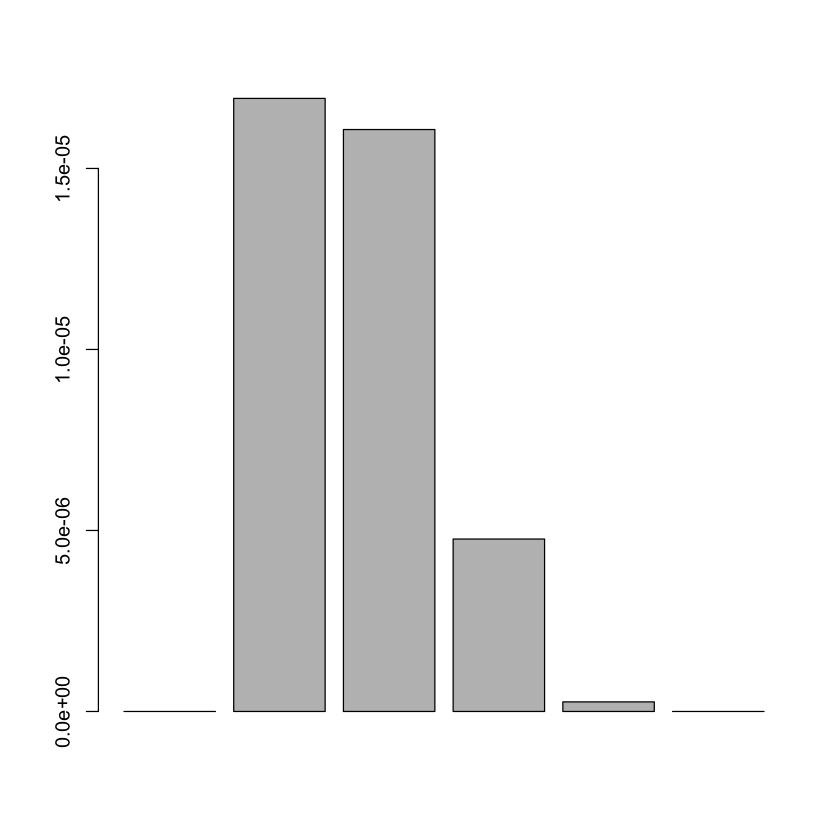

In [89]:
mle = c(likelihood(1), likelihood(2),likelihood(3),
             likelihood(4),likelihood(5), likelihood(6))
barplot(mle)
likelihood(2)

**B.2(i) [7 points] Now change your prior to be `prior = c(1/6, 1/6, 2/6, 1/6,1/6, 0)` and recompute the posterior distribution. Do you have a different guess? What might justify this prior? Can maximum likelihood estimation take into account this kind of adjustment?**

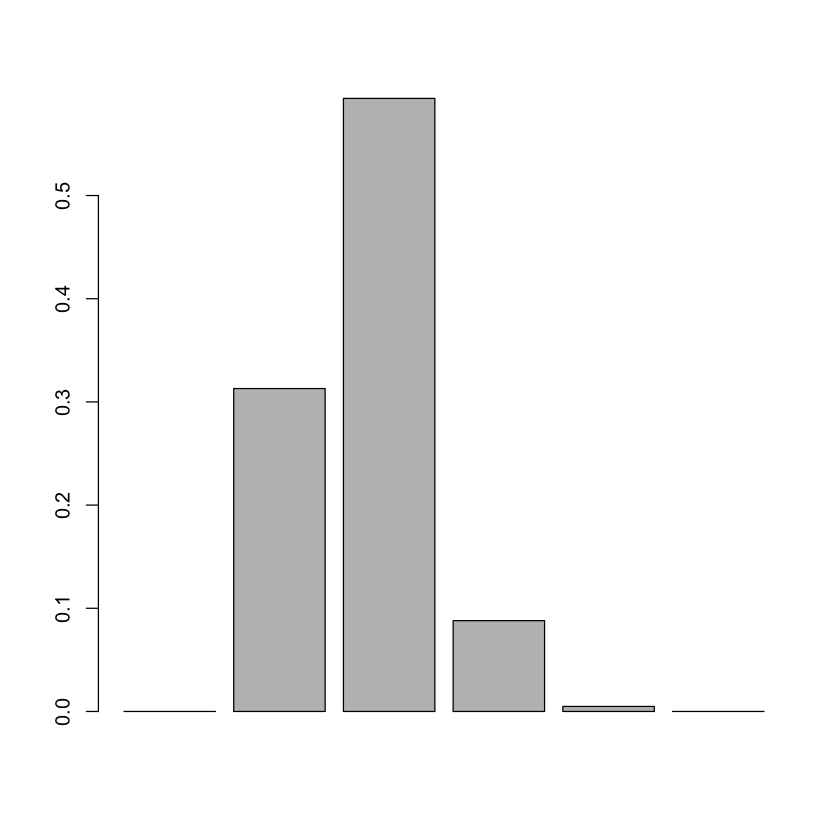

In [73]:
sum_px = 0; 
prior = c(1/6, 1/6, 2/6, 1/6,1/6, 0)
for (x in 1:6){ 
    sum_px = sum_px + likelihood(x) * prior[x]
}
posterior = c(likelihood(1) * prior[1]/sum_px, 
              likelihood(2) * prior[2]/sum_px,
              likelihood(3) * prior[3]/sum_px,
              likelihood(4) * prior[4]/sum_px,
              likelihood(5) * prior[5]/sum_px,
              likelihood(6) * prior[6]/sum_px)
barplot(posterior)

No seeing that three had a greater probability I believe that rolling three would be the most probable. What justifies this prior is that the rolls now have different probablities - they are biased dice. The MLE cannot take this into account because it does not include the prior probability in its calculation. 

## B.3 Normal conjugate example

Suppose Company $A$ is considering using recycled cobalt in the smartphone batteries that it produces. Denote the true mean battery life (run time on a full charge) as $\mu$.  Company $A$ would like to know if there is evidence to strongly suggest that $\mu$ exceeds or falls short of $24$ hours ($24$ hours is the true mean battery life of the battery currently in use). Researchers' prior beliefs about the population mean can be represented by a normal distribution, centered at $\theta = 24$, with variance $\tau^2 = 4$. That is: $\mu \sim N(24, 4)$.

Suppose the researchers at company $A$ tests $n = 25$ randomly selected phones with the recycled cobalt. Denote the battery life of phones in a possible sample as $X_1,...,X_n$. Assume that the standard deviation of times is $\sigma = 1$) For this particular sample, the data $x_1,...,x_n$ were measured as:

\begin{align*}
&25.0, \, 23.8,\, 23.3, \,24.0, \,24.5, \,25.3, \,22.4, \,25.1, \,20.3, \,22.3, \,25.4, \,22.9, \,24.4, \,24.9, \,24.3, \\
&23.0, \,24.7, \,24.7, \,23.5, \,23.9, \,24.7, \,25.4, \,23.9, \,23.1, \,23.0. \\
\end{align*}


In [126]:
x = c(25.0, 23.8, 23.3, 24.0, 24.5, 25.3, 22.4, 25.1, 20.3, 22.3, 25.4, 22.9, 24.4, 24.9, 24.3, 23.0, 24.7, 24.7, 23.5, 23.9, 24.7, 25.4, 23.9, 23.1, 23.0)
mean(x)

[1] 23.912

**B.3(a) [6 points] Compute the posterior distribution mean and variance of $\mu \, | \, \mathbf{x}$ using the conjugate prior result from class. What would be a reasonable point estimate for $\mu$ given the data?**

In [127]:
n = seq(0, 25, length.out = 200)
mu = ((24/4) + (n*mean(x)))/( (1/4) + (n/1^2) )
mean(mu)
sigma = (1/4 + n/1^2)^(-1)
mean(sigma)

posterior = rnorm(n, mu, sqrt(sigma))

[1] 23.91628

[1] 0.1945992

**B.3(b) [9 points] On the same plot, plot the prior distribution and posterior distribution. What do you notice about this plot?**

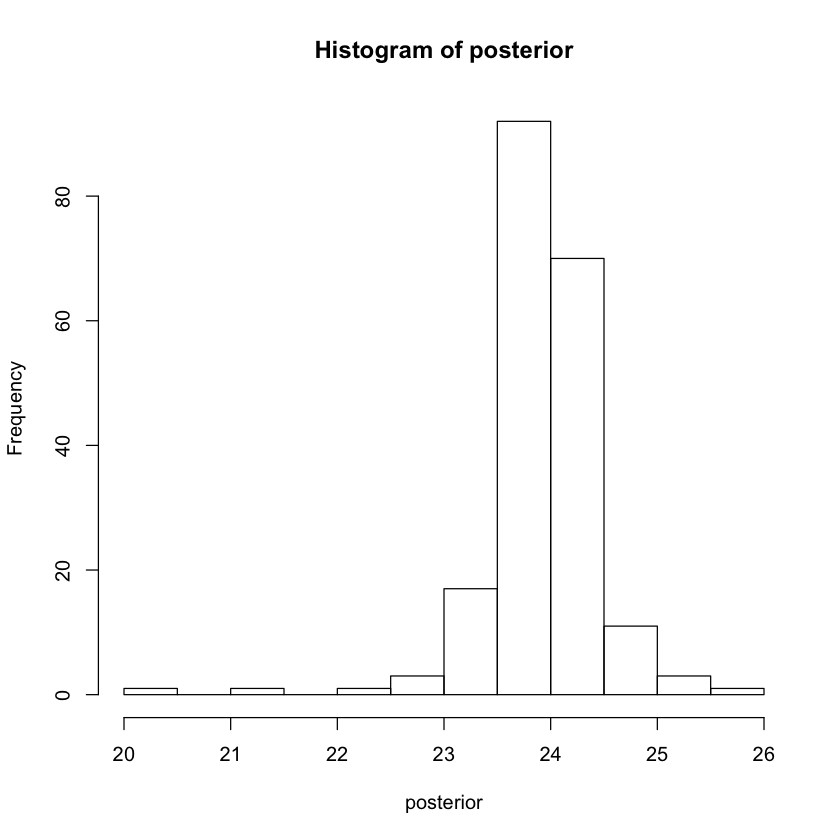

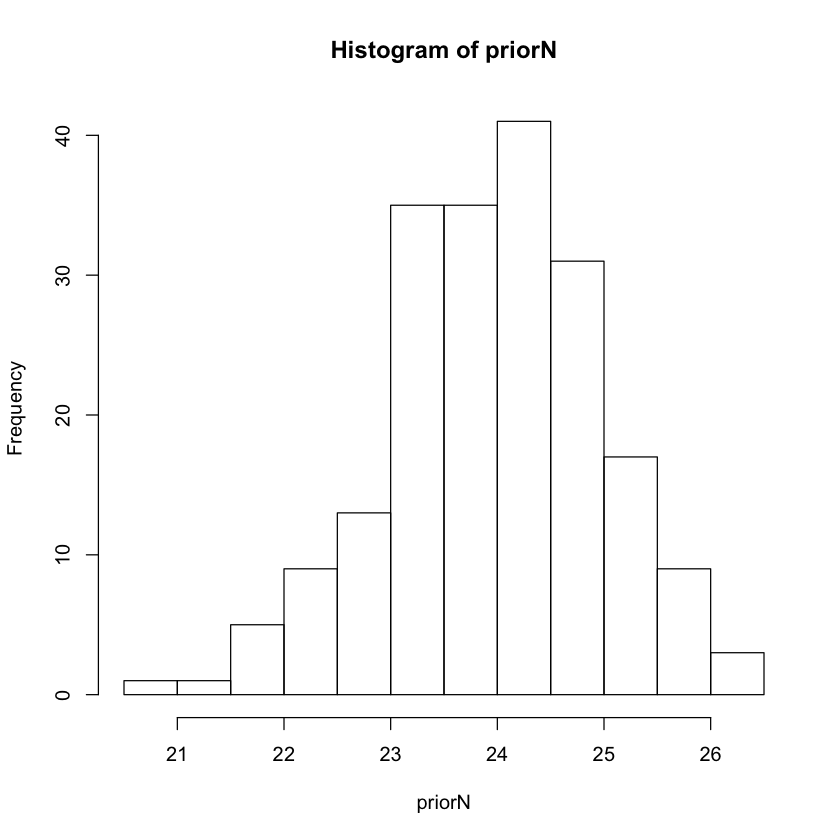

In [128]:
library(ggplot)
hist(posterior)
nmu = mean(rnorm(n, 24, 2))
priorN = rnorm(n, mu, 1)
hist(priorN)

ggplot(prioN)

New new prior plot seems to have more variability compared to our posterior plot. I think it has more varibility especially towards $23$ because we updated our belief based on the posterior. The posterior narrows down to the most likely possibility hence the prior graph is updating from our belief. 

**B.3(c) [4 points] Compute a $95\%$ credible interval for $\mu$ given the data. Interpret this interval. In particular, do we have evidence to suggest that $\mu = 24$?**

In [129]:
cred= 0.95
c(qnorm((1-cred)/2, mean(mu), mean(sigma)), qnorm(1-(1-cred)/2, mean(mu), mean(sigma)))

[1] 23.53487 24.29769

Yes, from the calculation above we have enough data to say that $\mu \approx 24$. We have a $95\%$ credibility that $\mu \in (23.53, 24.29)$

**B.3(d) [8 points] Now, suppose instead that prior to the experiment, researchers believed that $\theta = 13$ was the center of the prior distribution, with $\tau^2 = 1$. Compute the posterior distribution for this prior (for the same data as above), reproduce the plots from above, and describe the difference between this posterior and the one from previous parts.**

[1] 22.47915

[1] 0.1894004

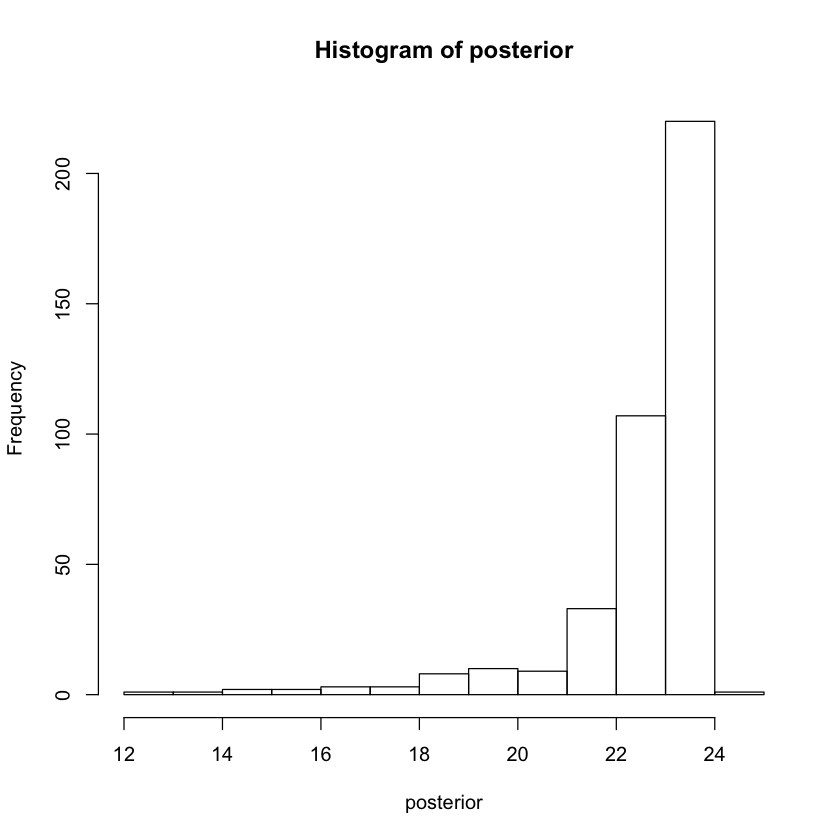

In [130]:
n = seq(0, 25, length.out = 400)
mu = (13 + (n*mean(x)))/( 1 + (n/1^2) )
mean(mu)
sigma = (1/4 + n/1^2)^(-1)
mean(sigma)

posterior = rnorm(n, mu, sqrt(sigma))
hist(posterior)

The first posterior graph had a more normal distribution look and this posterior is skewed to the left. They both trend toward a $\mu \approx 24$. 

**B.3(e) [4 points] Compute a credible interval for this new posterior distribution. Interpret this interval. In particular, do we have evidence to suggest that $\mu = 24$?**

In [118]:
cred= 0.95
c(qnorm((1-cred)/2, mean(mu), mean(sigma)), qnorm(1-(1-cred)/2, mean(mu), mean(sigma)))

[1] 22.11205 22.85060

The credible interaval shows that we are $95\%$ credible that $\mu \in (22.11, 22.85)$. Therefore, we do not have evidence to suggest that $\mu = 24$. 

**B.3(f) [3 points] What might be worrisome about the difference between the credible interval inferences made above? Does Bayesian inference suffer from issues related to [researcher degrees of freedom](https://en.wikipedia.org/wiki/Researcher_degrees_of_freedom)?**

WHat is most worrisome of the credible interval inferences is that it can induce false positives if not applied properly. In our case both graph appeared to show that $24$ was the most frequent but our credible intervals said otherwise. 

Yes, since Bayesian inference presume someones prior belief or hypothesis this can promote researcher degrees of freedom just to feel correct. Bayesian inference can suffer from someone biases therefore causing research degrees of freedom. 